# Python

In [1]:
class MoneyBox:
    def __init__(self, capacity):
        # Your code here
        if isinstance(capacity, int):
            self.capacity = capacity
            self.coins = 0
        else:
            print("Error: Please input capacity (integer)")

    def can_add(self, v):
        # True, if you can add v coins, False otherwise
        # Your code here
        return (self.coins + v <= self.capacity) 

    def add(self, v):
        # put v coins to moneybox
        # Your code here
        if self.can_add(v):
            self.coins += v
        else:
            print("Error: Not enough capacity")

## Sample

### initialization

In [2]:
myMoneyBox = MoneyBox(10)
myMoneyBox.coins

### can_add test

In [3]:
myMoneyBox.can_add(10)

True

### can_add test (error)

In [4]:
myMoneyBox.can_add(100)

False

### add test

In [5]:
myMoneyBox.coins

0

In [6]:
myMoneyBox.add(10)
myMoneyBox.coins

10

### add test (error)

In [7]:
myMoneyBox.coins

10

In [8]:
myMoneyBox.add(100)
myMoneyBox.coins

Error: Not enough capacity


10

# SQL

SELECT first_name, last_name FROM EMPLOYEE 

WHERE dt_work_from >= '2010-01-01' AND dt_work_to <= '2020-01-31'

# Pandas

## a.

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame({'days': [1, 1, 2, 2, 1, 3, 4],
               'values': [10, 10, 5, 3, -2, 4, 20]})
df

,days,values
0,1,10
1,1,10
2,2,5
3,2,3
4,1,-2
5,3,4
6,4,20


In [11]:
def func_a(df):
    output = pd.DataFrame()
    output["days"] = sorted(df["days"].unique())
    output["mean_values"] = df.groupby("days").mean().values
    output["median_values"] = df.groupby("days").median().values
    output["max_values"] = df.groupby("days").max().values
    output["min_values"] = df.groupby("days").min().values
    return output

In [12]:
func_a(df)

,days,mean_values,median_values,max_values,min_values
0,1,6,10,10,-2
1,2,4,4,5,3
2,3,4,4,4,4
3,4,20,20,20,20


## b.

In [13]:
df = pd.DataFrame({'employee': [1001, 1002, 1004, 1001, 1001, 1002, 1004, 1005, 1005],
                       'pos': [2, 2, 2, 2, 2, 2, 2, 2, 2],
                       'amount': [125, 542, 2345, 892, 100, 1234, 657, 34, 35]})
df

,employee,pos,amount
0,1001,2,125
1,1002,2,542
2,1004,2,2345
3,1001,2,892
4,1001,2,100
5,1002,2,1234
6,1004,2,657
7,1005,2,34
8,1005,2,35


In [14]:
def func_b(df):
    output = pd.DataFrame()
    output[["employee", "pos"]] = df[["employee", "pos"]].drop_duplicates(subset=["employee"]).sort_values(by="employee")
    output["amount_diff"] = (df.groupby("employee")["amount"].max() - df.groupby("employee")["amount"].min()).values
    return output.sort_values(by="amount_diff", ascending=False).iloc[:2].reset_index(drop=True)

In [15]:
func_b(df)

,employee,pos,amount_diff
0,1004,2,1688
1,1001,2,792


# ML

In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model
import itertools

## Load Data

In [17]:
df = pd.read_csv("test_restaurant.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index("date")
df.head()

,num_visitors
date,
2000-01-01,49.128490
2000-01-02,50.288060
2000-01-03,53.549213
2000-01-04,45.453240
2000-01-05,49.469402


## Visulization

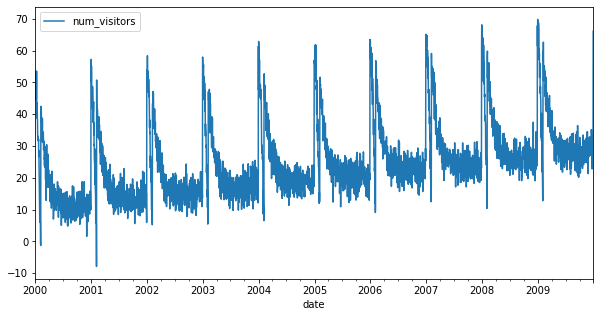

In [18]:
df.plot(figsize = (10, 5))

In [19]:
df[df<0]=0

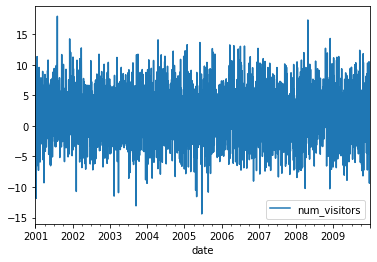

In [20]:
df.diff(365).dropna().plot()

## Time Series Analysis

In [21]:
nv = df["num_visitors"]
nv_diff = nv.diff(365).dropna()
smt.stattools.adfuller(nv_diff)

(-58.114943845539884,
 0.0,
 0,
 3285,
 {'1%': -3.4323422122539857,
  '5%': -2.862420241278329,
  '10%': -2.567238570806373},
 18577.665466434144)

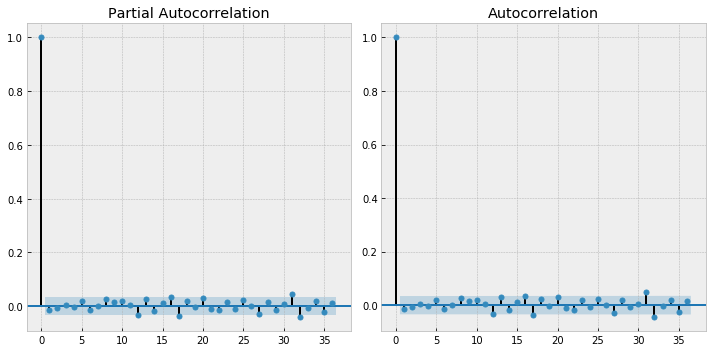

In [22]:
def tsplot(y,lags = None, figsize = (10,5), style='bmh'):
    with plt.style.context(style): 
        fig = plt.figure(figsize=figsize)
        layout = (1,2)
        pacf_ax = plt.subplot2grid(layout, (0,0))
        acf_ax = plt.subplot2grid(layout, (0,1)) 
        plot_pacf(y, lags = lags, ax=pacf_ax)
        plot_acf(y, lags = lags, ax=acf_ax)
        plt.tight_layout()
    return
tsplot(nv_diff)

In [23]:
sm.stats.diagnostic.acorr_ljungbox(nv_diff)

(array([ 0.65712844,  0.79968588,  0.83801798,  0.8566434 ,  2.26654872,
         2.99047773,  2.99091177,  5.63028882,  6.38235604,  7.52638347,
         7.54806056, 11.13724627, 14.13913078, 15.26649622, 15.7769121 ,
        19.79163424, 24.17696099, 26.10090215, 26.13938476, 29.23774166,
        29.52762585, 30.59189478, 31.67455732, 31.90925577, 33.63618593,
        33.64526889, 36.6990714 , 37.79475876, 38.03555627, 38.08054409,
        45.9255063 , 52.74389816, 52.78538758, 54.14256121, 56.33283544,
        57.32827941, 57.33284996, 57.79969641, 57.80054998, 59.60795794]),
 array([0.41757555, 0.67042534, 0.84035367, 0.93069693, 0.81116722,
        0.81004103, 0.88584169, 0.68856627, 0.70112401, 0.67499024,
        0.75312418, 0.51719476, 0.3641192 , 0.36018343, 0.39703122,
        0.22975234, 0.11470602, 0.09747309, 0.12635179, 0.08318261,
        0.1018994 , 0.10477359, 0.10710309, 0.12925897, 0.11591591,
        0.14419053, 0.10082288, 0.10234502, 0.12154761, 0.14769248,
      

[]

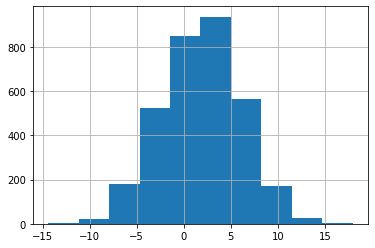

In [24]:
nv_diff.hist()
plt.plot()

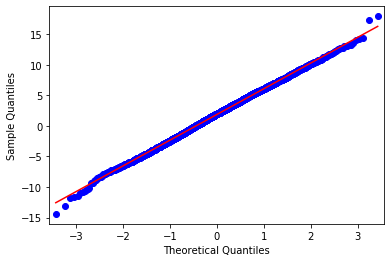

In [25]:
qqplot(nv_diff, line='s')
plt.show()

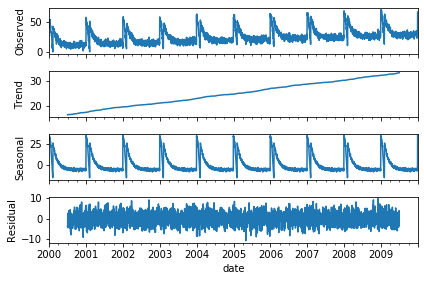

In [26]:
seasonal_decompose(df, model='additive', freq=365).plot()
plt.show()

In [27]:
#tsa.statespace.sarimax.SARIMAX

In [30]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 365) for x in list(itertools.product(p, d, q))]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            trend = 'ct',
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}- AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 365)- AIC:27296.257363799406


c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


MemoryError: 

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 964, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
MemoryError
c:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [1]:
pwd

'C:\\Users\\73964'